# Fashion MNIST - Description
Fashion-MNIST is a dataset of Zalando's article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

The objective of the project is - to use Fashion-MNIST data set to identify (predict) different fashion products(articles) from the given images using Machine Learning.

In [1]:
import numpy as np
import pandas as pd
import os
import gzip
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [3]:
Location = "../datasets/fashion_mnist"
filePath_train_set = os.path.join(Location, 'train-images-idx3-ubyte.gz')
filePath_train_label = os.path.join(Location, 'train-labels-idx1-ubyte.gz')
filePath_test_set = os.path.join(Location, 't10k-images-idx3-ubyte.gz')
filePath_test_label = os.path.join(Location, 't10k-labels-idx1-ubyte.gz')

In [5]:
# Download Fashion MNIST dataset if files are missing or corrupted
import urllib.request
import os

def download_fashion_mnist():
    """Download Fashion MNIST dataset from official source"""
    base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
    files = [
        'train-images-idx3-ubyte.gz',
        'train-labels-idx1-ubyte.gz',
        't10k-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz'
    ]
    
    # Create directory if it doesn't exist
    os.makedirs(Location, exist_ok=True)
    
    print(f"Downloading Fashion MNIST dataset to: {os.path.abspath(Location)}")
    
    for filename in files:
        filepath = os.path.join(Location, filename)
        if os.path.exists(filepath) and os.path.getsize(filepath) > 0:
            print(f"✓ {filename} already exists")
            continue
        
        url = base_url + filename
        print(f"Downloading {filename}...")
        try:
            urllib.request.urlretrieve(url, filepath)
            print(f"✓ {filename} downloaded successfully")
        except Exception as e:
            print(f"✗ Failed to download {filename}: {e}")

# Run download if files are missing or corrupted
download_fashion_mnist()


✓ train-images-idx3-ubyte.gz already exists
✓ train-labels-idx1-ubyte.gz already exists
✓ t10k-images-idx3-ubyte.gz already exists
✓ t10k-labels-idx1-ubyte.gz already exists


In [15]:

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

In [7]:
X_train = trainSet
X_test = testSet
y_train = trainLabel
y_test = testLabel
print(y_test.shape)

(10000,)


In [8]:
X_test.shape

(10000, 784)

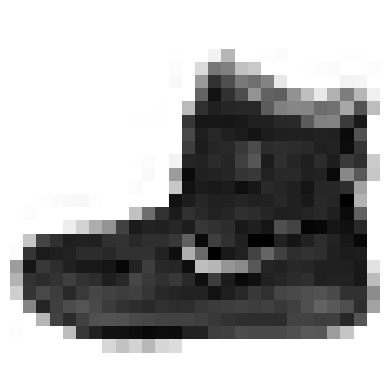

np.uint8(9)

In [9]:
showImage(X_train[0])
y_train[0]

In [38]:
np.random.seed(42)

In [14]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [4]:
#Training models
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,
                             precision_recall_curve)
from sklearn.linear_model import LogisticRegression

In [ ]:
# Train a Logistic Regression model. Multinomial is the default for multi-class problems, so we can omit it.
log_clf = LogisticRegression(
    C=10,
    solver='lbfgs',
    max_iter=1000
)

In [45]:
log_clf.fit(X_train_scaled, y_train)

/Users/akash/cloudXlabs/cloudxlabs_mylearnings_projects/venv_cloudxlabs/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",10
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mult

In [46]:
y_train_predict = log_clf.predict(X_train_scaled)

In [ ]:
#Calculate the various metrics scores like - accuracy, precision, recall, F1 score - using the actual and the predicted values and relevant functions
#Average=wei
log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict,average='weighted')
log_f1_score = f1_score(y_train, y_train_predict,average='weighted')
print("Logistic Regression - Training set metrics:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall: {log_recall:.4f}")
print(f"F1 Score: {log_f1_score:.4f}")

Logistic Regression - Training set metrics:
Accuracy: 0.8874
Precision: 0.8865
Recall: 0.8874
F1 Score: 0.8868


# Understanding `average='weighted'` — Beginner's Guide

## The Problem: Multi-Class Metrics

When you have **more than 2 classes** (like Fashion MNIST with 10 clothing types), calculating metrics like F1 score becomes tricky.

**Without averaging:**
- F1 score for class 0 (T-shirt): 0.85
- F1 score for class 1 (Trouser): 0.92
- F1 score for class 2 (Pullover): 0.78
- ...
- **But which one do you report?** 😕

---

## The Solution: `average='weighted'`

**`average='weighted'`** calculates the F1 score for **each class separately**, then combines them with **weights based on how many samples of each class exist**.

### Visual Example

```
Dataset has:
  Class 0 (T-shirt):  5000 samples → F1 = 0.85
  Class 1 (Trouser):  4000 samples → F1 = 0.92
  Class 2 (Pullover): 1000 samples → F1 = 0.78
  ───────────────────────────────────
  Total:             10000 samples

Weighted F1 = (0.85 × 5000 + 0.92 × 4000 + 0.78 × 1000) / 10000
            = (4250 + 3680 + 780) / 10000
            = 8710 / 10000
            = 0.871
```

---

## Why "Weighted"?

Classes with **more samples get more influence** in the final score.

| Approach | What It Means | Use When |
|---|---|---|
| **`average='weighted'`** | Bigger classes have more weight | You want to reflect **real-world class distribution** |
| **`average='macro'`** | All classes treated equally | You want to treat all classes as **equally important** |
| **`average='micro'`** | Overall metric across all samples | You want the **global accuracy-like score** |

---

## In Fashion MNIST Project

This calculates F1 score for all 10 clothing types, weighted by how many samples of each type exist in the dataset.

**Result:** A single F1 score that represents overall model performance, accounting for class distribution.

In [49]:
#Training the Model - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree based algorithms like Random Forest and XGBoost, so we can use the original data without scaling.
rnd_clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",20
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

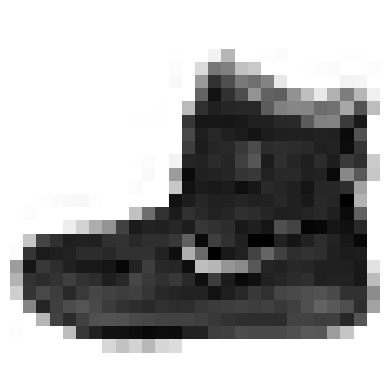

In [50]:
y_train_predict = rnd_clf.predict(X_train)
y_train[0] 
y_train_predict[0]
showImage(X_train[0])

In [3]:
#Calculate the various metrics scores like - accuracy, precision, recall, F1 score - using the actual and the predicted values and relevant functions
rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict,average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict,average='weighted')
print("Random Forest Classifier - Training set metrics:")
print(f"Accuracy: {rnd_accuracy:.4f}")
print(f"Precision: {rnd_precision:.4f}")
print(f"Recall: {rnd_recall:.4f}")
print(f"F1 Score: {rnd_f1_score:.4f}")

NameError: name 'accuracy_score' is not defined

In [52]:
#Use cross validation to find the best model for hyperparameter tuning
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

def display_scores(scores):
    print("Scores:", scores)
    print(f"Mean:", np.mean(scores))
    print(f"Standard Deviation", np.std(scores))

In [53]:
log_clf = LogisticRegression(solver="lbfgs", C=10, random_state=42)

In [55]:
# Use 3-fold cross-validation to evaluate the Logistic Regression model's accuracy on the training set.
log_cv_scores = cross_val_score(
    log_clf,
    X_train_scaled,
    y_train,
    cv=3,
    scoring='accuracy'
)
display_scores(log_cv_scores)

/Users/akash/cloudXlabs/cloudxlabs_mylearnings_projects/venv_cloudxlabs/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akash/cloudXlabs/cloudxlabs_mylearnings_projects/venv_cloudxlabs/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might al

Scores: [0.8433  0.8504  0.84885]
Mean: 0.8475166666666668
Standard Deviation 0.0030480412653957783


/Users/akash/cloudXlabs/cloudxlabs_mylearnings_projects/venv_cloudxlabs/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
log_cv_accuracy = log_cv_scores.mean()
y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)

/Users/akash/cloudXlabs/cloudxlabs_mylearnings_projects/venv_cloudxlabs/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akash/cloudXlabs/cloudxlabs_mylearnings_projects/venv_cloudxlabs/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might al

In [57]:
confusion_matrix(y_train, y_train_pred)


array([[4884,   19,  132,  251,   33,   13,  592,    5,   65,    6],
       [  22, 5803,   20,  112,   13,    1,   23,    3,    2,    1],
       [ 106,   19, 4489,   58,  704,   11,  560,    3,   49,    1],
       [ 242,   87,   83, 5185,  187,    3,  180,    4,   25,    4],
       [  19,   14,  590,  202, 4623,    2,  511,    2,   37,    0],
       [   4,    3,    0,    6,    0, 5547,    5,  253,   53,  129],
       [ 877,   22,  694,  212,  568,    7, 3507,    5,  105,    3],
       [   1,    0,    1,    0,    0,  227,    0, 5548,   11,  212],
       [  58,    4,   44,   40,   25,   51,  119,   34, 5603,   22],
       [   0,    2,    0,    1,    0,  102,    2,  225,    6, 5662]])

In [58]:
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')
print("Logistic Regression - Cross-validated training set metrics:")
print(f"Accuracy: {log_cv_accuracy:.4f}")
print(f"Precision: {log_cv_precision:.4f}")
print(f"Recall: {log_cv_recall:.4f}")
print(f"F1 Score: {log_cv_f1_score:.4f}")

Logistic Regression - Cross-validated training set metrics:
Accuracy: 0.8475
Precision: 0.8463
Recall: 0.8475
F1 Score: 0.8468


In [59]:
#Random Forest Classifier - Cross-validated training set metrics
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
rnd_cv_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring='accuracy')
display_scores(rnd_cv_scores)

Scores: [0.84465 0.84965 0.84995]
Mean: 0.8480833333333333
Standard Deviation 0.0024308206204672646


In [60]:
rnd_cv_accuracy = rnd_cv_scores.mean()
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)

In [86]:
confusion_matrix(y_train, y_train_pred)
print(y_train_pred.shape)

(60000,)


In [63]:
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')
print("Random Forest Classifier - Cross-validated training set metrics:")
print(f"Accuracy: {rnd_cv_accuracy:.4f}")
print(f"Precision: {rnd_cv_precision:.4f}")
print(f"Recall: {rnd_cv_recall:.4f}")
print(f"F1 Score: {rnd_cv_f1_score:.4f}")

Random Forest Classifier - Cross-validated training set metrics:
Accuracy: 0.8481
Precision: 0.8475
Recall: 0.8481
F1 Score: 0.8456


From the results of the cross-validation process, we see that both the logistic regression and random forest have given the best results (nearly accuracy - 85%, standard deviation for accuracy - 0.002, Precision, Recall, F1 score nearly 0.85).

# Fine-Tuning the Model - Grid Search - Fine-Tuning the Model - Grid Search - Dimensionality Reduction Reduction
Grid-search takes a long time to run, so apply dimensionality reduction using PCA to reduce the number of features and then apply grid-search to find the best hyperparameters for the model. PCA is a technique that reduces the dimensionality of the data while retaining most of the variance in the data. It does this by finding the principal components of the data, which are the directions in which the data varies the most. By keeping only the top principal components, we can reduce the number of features while still retaining most of the information in the data. This can help speed up grid-search and improve model performance by reducing overfitting.

For the current problem, with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784), and there was significant loss of information (quality) in the 'recovered' (decompressed) images. Hence, we have selected n_components=0.99, which gives 459 features (out of original 784) and there is no significant loss of information (quality) in the 'recovered' images.


In [13]:
# Dimensionality reduction helper
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_train_reduced.shape


NameError: name 'X_train_scaled' is not defined

# PCA Dimensionality Reduction — Reduced Dimensions and Variance

- **Reduced dimensions:** Brought feature count down from **784 → 527** using PCA (principal component analysis).

- **Why `n_components` matters:** This parameter controls how many principal components to keep. A higher `n_components` preserves more of the original variance (information) but increases computation and may keep noise; a lower `n_components` speeds up training but can lose important signal.

- **Explained variance ratio:** Use `pca.explained_variance_ratio_` (and its cumulative sum) to see how much of the dataset variance each component captures. Choose `n_components` so the cumulative explained variance meets your threshold (common choices: 0.95 or 0.99).

- **Practical advice:** Inspect the cumulative variance plot and pick the smallest `n_components` that retains the desired proportion of variance — this balances model performance and speed.

Example checks you can run after fitting PCA:

```python
print(pca.explained_variance_ratio_[:10])            # first 10 component variances
print(pca.explained_variance_ratio_.cumsum()[-1])   # total variance retained
```

In [ ]:
#checking the variance ratio sum to confirm that we have retained 99% of the variance in the data.
np.sum(pca.explained_variance_ratio_)

np.float64(0.9900724774559713)

In [69]:
#Inverse transform to get back the original data from the reduced data and check how much information we have lost in the process of dimensionality reduction.
X_train_recovered = pca.inverse_transform(X_train_reduced)

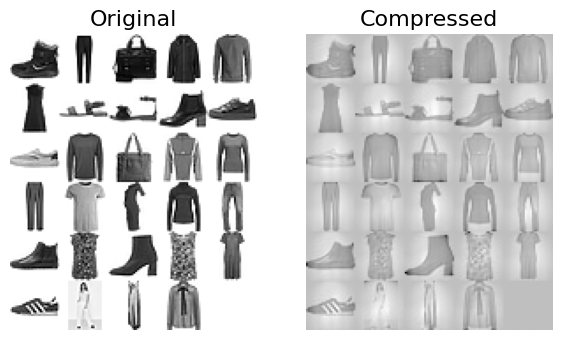

In [68]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

# Fine-Tuning the Model - Grid Search - Tuning Hyperparameters
Since our best model is Voting Classifier which is made up of two models Logistic Regression and Random Forrest. To do the grid search, we will have to supply the various values of parameters for both of the underlying models.

Since the grid search is a very intensive process, we are going to only try a handful of permutations because it would take a huge time otherwise.

In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = [
    {
        "lr__solver":["lbfgs"],
        "lr__C":[10],
        "rf__n_estimators":[20],
        "rf__max_depth":[10, 15],
    }]

log_clf_ens = LogisticRegression(solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft'
)

In [12]:
#We will perform the Grid Search with 3 folds i.e. cv=3
grid_search = GridSearchCV(
    voting_clf_grid_search,
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

In [77]:
grid_search.fit(X_train_reduced, y_train)

/Users/akash/cloudXlabs/cloudxlabs_mylearnings_projects/venv_cloudxlabs/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akash/cloudXlabs/cloudxlabs_mylearnings_projects/venv_cloudxlabs/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might al

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",VotingClassif...voting='soft')
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'lr__C': [10], 'lr__solver': ['lbfgs'], 'rf__max_depth': [10, 15], 'rf__n_estimators': [20]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candida

In [78]:
grid_search.best_params_

{'lr__C': 10,
 'lr__solver': 'lbfgs',
 'rf__max_depth': 15,
 'rf__n_estimators': 20}

In [81]:
final_model = grid_search.best_estimator_

In [80]:
#Printing the mean test scores for each hyperparameter combination tested during the Grid Search along with the corresponding hyperparameters.
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.3848285092385988 {'lr__C': 10, 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.3707358121340036 {'lr__C': 10, 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


In [ ]:
#EVALUATION ON TEST SET
X_test_reduced = pca.transform(X_test)
y_test_predict = final_model.predict(X_test_reduced)

In [95]:
confusion_matrix(y_test, y_test_predict)

array([[650,  10,  35,  26, 120,   0, 139,   1,  14,   5],
       [  0, 960,   3,  11,  23,   0,   2,   0,   1,   0],
       [  8,   3, 462,   3, 491,   0,  22,   2,   7,   2],
       [ 12,  50,  19, 672, 214,   0,  25,   0,   5,   3],
       [  0,   0,  12,   1, 979,   0,   6,   0,   2,   0],
       [  0,   0,   0,   0,   1, 687,   0,  68,  21, 223],
       [ 57,   1,  81,  13, 545,   0, 280,   0,  18,   5],
       [  0,   0,   0,   0,   0,  12,   0, 796,   2, 190],
       [  0,   0,   6,   4,  36,   2,  15,   5, 920,  12],
       [  0,   0,   0,   0,   0,   1,   0,  11,   1, 987]])

In [5]:
final_accuracy = accuracy_score(y_test, y_test_predict)
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')
print("Final model - Test set metrics:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1 Score: {final_f1_score:.4f}")

NameError: name 'y_test' is not defined